Vectorized DDQN with random agent initialization

In [3]:
from datetime import datetime
from imp import reload
from matplotlib import pyplot as plt

import ddqn_class

In [4]:
reload(ddqn_class)

<module 'ddqn_class' from '/Users/liavkoren/AI Curriculum/dqn_implementations/mine/ddqn_class.py'>

In [1]:


def benchmark(num_runs = 3, random_seeds = (0, 100, 1000), env_name='CartPole-v1', **kwargs):
    assert len(random_seeds) == num_runs
    runs = []
    for idx in range(num_runs):  
        np.random.seed(random_seeds[idx])
        start = datetime.now()
        ddqn = ddqn_class.DoubleDQN(env_name, render_every=0, **kwargs)
        print(f'{start}')
        ddqn.run()
        end = datetime.now()
        data = {'instance': ddqn, 'total_time': (end-start).total_seconds()}
        runs.append(data)
        print(f'\nRun {idx} total time: {(end-start).total_seconds()/60:.2f} mins')        
    return runs

def print_benchmark(data):
    for run in data:
        ddqn = run['instance']
        time = run['total_time']
        for key, val in ddqn.__dict__.items():
            if isinstance(val, list):
                continue
            print(f'{key}: {val}')

        print(f'\nTotal training time: {time/60:.2f} minutes')
        print('---')    
        

/Users/liavkoren/Envs/ai-gym/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [5]:
data = benchmark()
print_benchmark(data)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Starting to initializing memory with random agent.
Finished initializing memory with random agent.
2018-05-15 19:40:00.003920
Episode: 990, steps: 350691, reward: 500.0, 10-episode mean reward: 333.5, 100-episode mean reward: 403.36 
Run 0 total time: 14.79 mins
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Starting to initializing memory with random agent.
Finished initializing memory with random agent.
2018-05-15 19:54:47.597207
Episode: 990, steps: 286735, reward: 500.0, 10-episode mean reward: 473.4, 100-episode mean reward: 368.2  
Run 1 total time: 11.27 mins
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Starting to initializing memory with random agent.
Finished initializing memory with random agent.
2018-05-15 20:06:03.505431
Episode: 990, steps: 264411, reward: 500.0, 10-epis

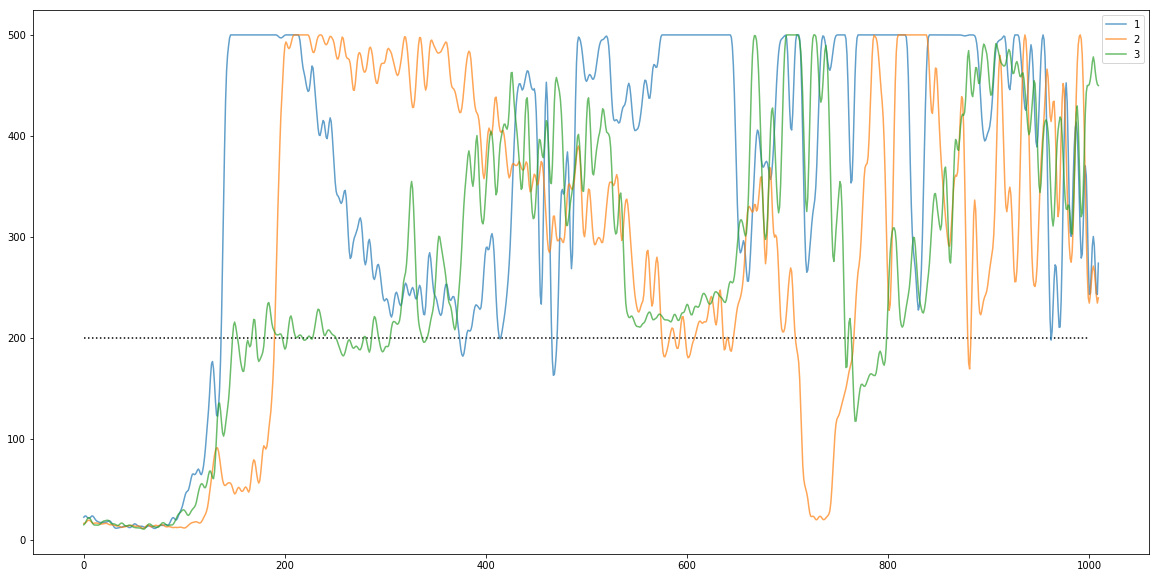

In [10]:
%matplotlib inline
from smooth import smooth


def plot_episode_rewards(data, hline_at=200):
    plt.figure(figsize=(20, 10))
    for idx, ddqn in enumerate([run['instance'] for run in data]):    
        plt.plot(smooth(np.array(ddqn.episode_rewards), window_len=11), alpha=0.7)
        # plt.plot(ddqn.episode_rewards, alpha=0.7)
    plt.legend(['1', '2', '3'])
    plt.hlines(hline_at, 0, len(ddqn.episode_rewards), linestyles='dotted', )

plot_episode_rewards(data)

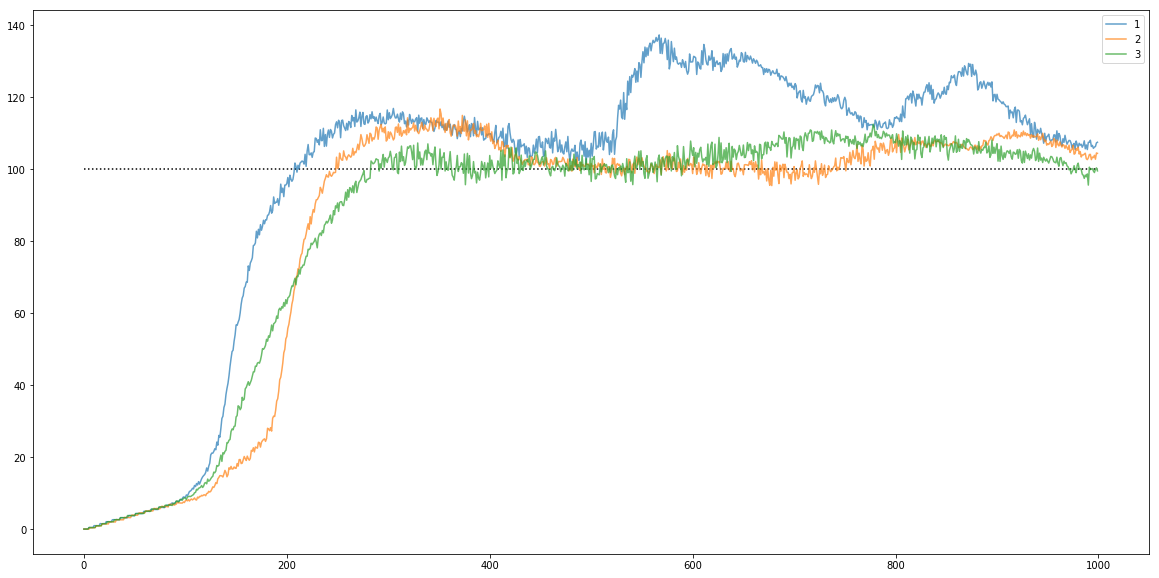

In [9]:
def plot_q_vals(data, hline_at=100):
    plt.figure(figsize=(20, 10))
    for idx, ddqn in enumerate([run['instance'] for run in data]):    
        # plt.plot(ddqn.online_q_history, alpha=0.7)
        plt.plot(ddqn.target_q_history, alpha=0.7)
    plt.hlines(hline_at, 0, len(ddqn.target_q_history), linestyles='dotted', )
    plt.legend(['1', '2', '3'])

plot_q_vals(data)

In [14]:
for idx, run in enumerate(data):
    instance = run['instance']
    print(f'{idx}: {sum(instance.episode_rewards)/len(instance.episode_rewards)}')

0: 391.416
1: 335.776
2: 322.348
